# Fikspunktiterasjoner og Newtons metode

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **13. oktober 2025**

## Fikspunktiterasjoner

Tidligere så vi at $x_0$ er et fikspunkt til $f(x)$ dersom

$$
f(x_0)=x_0,
$$

og vi kunne finne dette fikspunktet ved å studere følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ gitt rekursivt som

$$
a_{n+1}=f(a_n),\qquad\text{med initialverdien $a_0$.}
$$

Vi skal nå studere fikspunktiterasjoner ytterligere.

#### Eksempel

La oss fortsette med å finne $\sqrt{2}$. Tidligere så vi at

$$
f(x)=\frac{1}{2}\left(x+\frac{2}{x}\right)
$$

var en måte å skrive $x^2-2=0$ om til en fikspunktiterasjon.

En annen måte er gitt ved 

$$
g(x)=\frac{2}{x}.
$$

La oss undersøke hva som skjer for disse to eksemplene. Under finner dere en python-kode som kan hjelpe til med å visualisere dette. Prøv også med ulike initialverdier.

In [1]:
import numpy as np

# generisk iterativ fikspunktmetode
def fikspunkt(F, a, toleranse = 1.0E-10, N = 500):
    Fa = F(a)
    n = 0
    punkter = [(a, Fa)] 
    while abs(Fa-a) >= toleranse and n < N: # vi gjør dette mens |F(x)-x|>=toleranse og n<N
        a = F(a)   # ny initialverdi
        n = n+1    # ny n
        Fa = F(a)  # ny F(x)
        punkter.append((a, Fa))
    if n >= N:
        print("Fant ikke fikspunkt for gitt startverdi. Returnerer nåværende verdier.")
        return Fa, punkter
    else: 
        return Fa, punkter

In [2]:
# definerer funksjonen vi skal bruke
def F(x):
    return 0.5*(x+(2/x)) # vi bruker f(x)
#def F(x):
#    return 2/x # vi bruker g(x)

a_0 = 9 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
svar, punkter = fikspunkt(F, a_0)

# skriver ut punkter
n = 0
for punkt in punkter:
    print("n = {:3d},\t x = {:1.15f},\t F(x) = {:1.15f}".format(n,*punkt))
    n = n+1

n =   0,	 x = 9.000000000000000,	 F(x) = 4.611111111111111
n =   1,	 x = 4.611111111111111,	 F(x) = 2.522423025435073
n =   2,	 x = 2.522423025435073,	 F(x) = 1.657655721288586
n =   3,	 x = 1.657655721288586,	 F(x) = 1.432089434900886
n =   4,	 x = 1.432089434900886,	 F(x) = 1.414325129015109
n =   5,	 x = 1.414325129015109,	 F(x) = 1.414213566773468
n =   6,	 x = 1.414213566773468,	 F(x) = 1.414213562373095
n =   7,	 x = 1.414213562373095,	 F(x) = 1.414213562373095


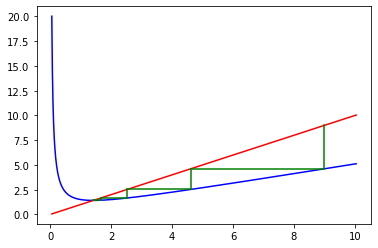

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.05, 10.05, 0.01) # lager mesh for grafer på en annen måte enn tidligere

# fikspunktet inntreffer når følgende grafer skjærer hverandre
plt.plot(x, F(x), 'b') # plotter F(x) i blått 
plt.plot(x, x, 'r')    # plotter y = x i rødt

# visualiser fikspunktiterasjonen i grønt
for x, y in punkter:
    plt.plot([x, x], [x, y], 'g') # lager vertikal linje mellom punktene (x,x) og (x,y)
    plt.plot([x, y], [y, y], 'g') # lager horisontal linje mellom punktene (x,y) og (y,y)
plt.show()

Fikspunktiterasjonen for $x=g(x)$ konvergerer altså ikke mot $\sqrt{2}$ selv om løsningsmengden er gitt ved $x^2-2=0$ her også. Vi trenger matematisk teori som sikrer oss konvergens av fikspunktiterasjoner.

### Konvergens av fikspunktiterasjoner

Vi begynner med et helt grunnleggende teorem.

---

**Teorem.** Anta at $f(x)$ er kontinuerlig, at følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ er gitt rekursivt som

$$
a_{n+1}=f(a_n),\qquad\text{med initialverdien $a_0$,}
$$ 

og at $\lim_{n\to\infty}a_n=r$. 

Da er $f(r)=r$, altså er $r$ et fikspunkt for $f(x)$.

---

Beviset er rett og slett at for kontinuerlige funksjoner kan vi flytte grenseverdien inn i funksjonen:

$$
r=\lim_{n\to\infty}a_{n+1}=\lim_{n\to\infty}f(a_n)=f\left(\lim_{n\to\infty}a_n\right)=f(r).
$$

Her antok vi at følgen $\{a_n\}_{n=0}^{\infty}$ konvergerte mot $r$. Når kan vi garantere dette?

I eksempelet over hadde vi faktisk at 

$$
f'(\sqrt{2})=\frac{1}{2}-\frac{1}{(\sqrt{2})^2}=0,
$$

eller for $x$ nærme fikspunktet $\sqrt{2}$ vil $|f'(x)|<1$, mens i det andre tilfellet var

$$
g'(\sqrt{2})=-\frac{2}{(\sqrt{2})^2}=-1,
$$

og da kan vi ikke garantere at $|g'(x)|<1$ for $x$ nærme fikspunktet. 

---

**Teorem.** Anta at $r$ er et fikspunkt for $f(x)$, at $f'(x)$ er kontinuerlig i et åpent område om $r$, og at $|f'(r)|<1$. 

Da er vil følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ er gitt rekursivt som

$$
a_{n+1}=f(a_n)
$$ 

konvergere mot $r$ for alle initialverdier $a_0$ som starter nærme nok $r$.

---

Beviset er basert på middelverdisetningen. Legg merke til at

$$
a_{n+1}-r=f(a_n)-f(r)=f'(\xi_n)(a_n-r),\qquad \text{for $\xi_n$ mellom $a_n$ og $r$.}
$$

Dette gir selvsagt at 

$$
|a_{n+1}-r|=|f'(\xi_n)||a_n-r|.
$$

Siden $|f'(r)|<1$ og $f'(x)$ er kontinuerlig i et åpent område om $r$, gir skjæringssetningen at det eksisterer et reelt tall $\delta>0$ slik at 

$$
|f'(x)|<1,\qquad \text{for $x\in(r-\delta,r+\delta)$.}
$$

Vi ser også at hvis $a_n\in(r-\delta,r+\delta)$, vil $\xi_n\in(r-\delta,r+\delta)$ slik at $|f'(\xi_n)|<1$.

Da får vi

$$
|a_{n+1}-r|<|a_n-r|<|a_{n-1}-r|<\ldots<|a_0-r|.
$$

Følgen $\{b_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ gitt ved $b_n=|a_n-r|$ er avtagende og nedre begrenset av $0$, og derfor konvergent. Grenseverdien er gitt ved

$$
\lim_{n\to\infty}b_n=\lim_{n\to\infty}|a_n-r|=\left|\lim_{n\to\infty}a_n-r\right|=\lim_{n\to\infty}|f(a_{n-1})-f(r)|=\left|f\left(\lim_{n\to\infty}a_{n-1}\right)-f(r)\right|=|f(r)-f(r)|=0.
$$

Dette gir at $\lim_{n\to\infty}a_n=r$.

La oss nå vise at med betingelsene i teoremet kan $f(x)$ bare kan ha ett fikspunkt. 

Anta at det finnes to fikspunkt, $r$ og $s$, som ligger nærme hverandre men som ikke er like. Hva kan vi da si om $r$ og $s$? Ved middelverdisetningen og betingelsene på den deriverte i fikspunktene $r$ og $s$, får vi at

$$
|r-s|=|f(r)-f(s)|\leq |f'(\xi)||r-s|<|r-s|,\qquad \text{for $\xi$ mellom $r$ og $s$.}
$$

Dette er en selvmotsigelse, og derfor må $r=s$.

I forbindelse med skjæringssetningen diskuterte vi betingelser på $f(x)$ som sikret at det var minst ett fikspunkt $r$. Sånn sett kunne vi ha byttet ut antagelsen om at det finnes et fikspunkt $r$ for $f(x)$ med antagelser direkte på $f(x)$.

### Feilanalyse for fikspunktiterasjoner

---

**Definisjon.** Vi definerer feilen $e_n$ i en fikspunktiterasjon til å være 

$$
e_n=|a_n-r|.
$$

Vi definerer også konvergensordenen til å være det reelle tallet $q$ slik at grenseverdien

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_{n})^q}
$$

eksisterer og er forskjellig fra $0$.

---

Fra beviset over ser vi at

$$
\lim_{n\to\infty}\frac{e_{n+1}}{e_{n}}=\lim_{n\to\infty}|f'(\xi_n)|=|f'(r)|<\infty.
$$

Altså er konvergensorden for fikspunktiterasjonen med $f(x)$ slik at $0\neq|f'(r)|<1$ lik $1$. 

Det at $|f'(r)|<1$ sier altså at feilen avtar. 

I eksempelet hvor $f(x)=\frac{1}{2}(x+\frac{2}{x})$ så vi at $f'(\sqrt{2})=0$. I dette tilfellet må vi gjøre en mer nøyaktig analyse, men konklusjonen blir ved hjelp av Taylors teorem at

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_{n})^2}=\lim_{n\to\infty}\frac{1}{2}|f''(\xi_n)|=\frac{1}{2}|f''(r)|,
$$

hvor 

$$
\frac{1}{2}|f''(\sqrt{2})|=\frac{1}{2}\left|\frac{2}{(\sqrt{2})^3}\right|\approx0.3535534.
$$

La oss teste teorien numerisk:

In [4]:
import math

# definerer funksjonen vi skal bruke
def F(x):
    return 0.5*(x+(2/x)) # vi bruker f(x)

a_0 = 9 # en mulig initialverdi nærme rota av 2

# finner fikspunkt med gitt initialverdi
svar, punkter = fikspunkt(F, a_0)

# henter ut selve følgen
a = np.zeros(len(punkter))
n = 0 
for x, y in punkter:
    a[n] = x
    n = n+1

# sjekker forholdet e_{n+1}/(e_n)^2
for i in range(0,len(a)-1):
    print("følgens verdi = {:>12}, rota av 2 = {:>12}".format(str(a[i]), str(math.sqrt(2))))
    print("utregnet forhold = {:>12}, teoretisk forhold = {:>12}".format(str(abs(a[i+1]-math.sqrt(2))/(abs(a[i]-math.sqrt(2))**2)), str(2**(-3/2))))
    print("============================================")
print("følgens verdi = {:>12}, rota av 2 = {:>12}".format(str(a[i+1]), str(math.sqrt(2))))

følgens verdi =          9.0, rota av 2 = 1.4142135623730951
utregnet forhold = 0.05555555555555555, teoretisk forhold = 0.3535533905932738
følgens verdi = 4.611111111111111, rota av 2 = 1.4142135623730951
utregnet forhold = 0.10843373493975902, teoretisk forhold = 0.3535533905932738
følgens verdi = 2.5224230254350735, rota av 2 = 1.4142135623730951
utregnet forhold = 0.19822210428552478, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.6576557212885863, rota av 2 = 1.4142135623730951
utregnet forhold = 0.30163078712829466, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4320894349008857, rota av 2 = 1.4142135623730951
utregnet forhold = 0.3491402057823368, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4143251290151087, rota av 2 = 1.4142135623730951
utregnet forhold = 0.3535254970448626, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4142135667734679, rota av 2 = 1.4142135623730951
utregnet forhold = 11.467303203178787, teoretisk forhold = 0.35355

Det siste utregningen av forholdet $\frac{e_{n+1}}{(e_n)^2}$ gir et for høyt tall pga. flyttallsfeil. Følgen kommer tross alt nærmere og nærmere verdien av $\sqrt{2}$ for hver utregning.

## Newtons metode

Tidligere så vi at $x_0$ er en rot eller et nullpunkt til $f(x)$ dersom

$$
f(x_0)=0.
$$

Ideen i Newtons metode er å bytte ut funksjonen $f(x)$ med den lineære tilnærmingen av $f(x)$ om punktet $x=a_n$:

$$
f(x)\approx f(a_n)+f'(a_n)(x-a_n).
$$

Vi får da

$$
f(a_n)+f'(a_n)(x-a_n)=0 \qquad\Longleftrightarrow\qquad x=a_n-\frac{f(a_n)}{f'(a_n)}
$$

Nå bør da $x$ være en approksimasjon av $x_0$, og vi lar derfor $x=a_{n+1}$. Dette gir oss den rekursive følgen

$$
a_{n+1}=a_n-\frac{f(a_n)}{f'(a_n)},\qquad\text{med initialverdien $a_0$.}
$$

La oss implementere Newtons metode for 

$$
f(x)=x^2-2,
$$

med $f'(x)=2x$.

In [5]:
import numpy as np

# generisk newtons metode
def newton(F, dF, a, toleranse = 1.0E-10, N = 500):
    Fa = F(a)
    n = 0
    punkter = [(a, Fa)] 
    while abs(Fa-0) >= toleranse and n < N: # vi gjør dette mens |F(x)-0|>=toleranse og n<N
        a = a-F(a)/dF(a)   # ny initialverdi
        n = n+1    # ny n
        Fa = F(a)  # ny F(x)
        dFa = dF(a)# ny dF(x)
        punkter.append((a, Fa))
    if n >= N:
        print("Fant ikke fikspunkt for gitt startverdi. Returnerer nåværende verdier.")
        return Fa, punkter
    else: 
        return Fa, punkter

In [6]:
# definerer funksjonen vi skal bruke
def F(x):
    return x**2-2 # vi bruker f(x)

def dF(x):
    return 2*x # vi bruker f'(x)

a_0 = 9 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
svar, punkter = newton(F, dF, a_0)

# skriver ut punkter
n = 0
for punkt in punkter:
    print("n = {:3d},\t x = {:1.15f},\t F(x) = {:1.15f}".format(n,*punkt))
    n = n+1

n =   0,	 x = 9.000000000000000,	 F(x) = 79.000000000000000
n =   1,	 x = 4.611111111111111,	 F(x) = 19.262345679012341
n =   2,	 x = 2.522423025435073,	 F(x) = 4.362617919245030
n =   3,	 x = 1.657655721288586,	 F(x) = 0.747822490320783
n =   4,	 x = 1.432089434900886,	 F(x) = 0.050880149554738
n =   5,	 x = 1.414325129015108,	 F(x) = 0.000315570563603
n =   6,	 x = 1.414213566773468,	 F(x) = 0.000000012446134
n =   7,	 x = 1.414213562373095,	 F(x) = 0.000000000000000


#### Eksempel

Bruk Newtons metode til å løse 

$$
f(x)=x^3+x^2-3x-3=0.
$$ 

Velg $a_0=2$.

In [7]:
# definerer funksjonen vi skal bruke
def F(x):
    return x**3+x**2-3*x-3 # vi bruker f(x)

def dF(x):
    return 3*x**2+2*x-3 # vi bruker f'(x)

a_0 = 2 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
svar, punkter = newton(F, dF, a_0)

# skriver ut punkter
n = 0
for punkt in punkter:
    print("n = {:3d},\t x = {:1.15f},\t F(x) = {:1.15f}".format(n,*punkt))
    n = n+1

n =   0,	 x = 2.000000000000000,	 F(x) = 3.000000000000000
n =   1,	 x = 1.769230769230769,	 F(x) = 0.360491579426490
n =   2,	 x = 1.732923810396993,	 F(x) = 0.008266910438978
n =   3,	 x = 1.732051306108974,	 F(x) = 0.000004718235672
n =   4,	 x = 1.732050807569040,	 F(x) = 0.000000000001539


Vi kontrollerer ved å plotte den aktuelle funksjonen:

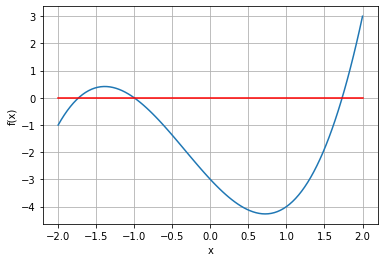

In [8]:
# plotter funksjonen på et intervall 
x = np.linspace(-2, 2, 101)     # antall x-verdier i intervallet [-2,2]
plt.plot(x, F(x))               # plotter funksjonen f(x) i blått
plt.plot(x, 0*x, 'r')           # plotter x-aksen i rødt
plt.xlabel('x')
plt.grid(True)
plt.ylabel('f(x)');

Legg merke til at det er $2$ andre nullpunkt også, men vi finner det nullpunktet som er nærme initialverdien $a_0=2$.

### Newtons metode er en fikspunktiterasjon

Hvis vi lar 

$$
F(x)=x-\frac{f(x)}{f'(x)}
$$

ser vi at Newtons metode er en fikspunktiterasjon gitt ved 

$$
a_{n+1}=F(a_n).
$$

Konvergens- og feilanalysen vi gjorde for fikspunktiterasjoner gjelder da også for Newtons metode. Vi legger også merke til at

$$
F'(x)=\frac{f(x)f''(x)}{(f'(x))^2}.
$$

Dette betyr at i fikspunktet, $r$, som da er nullpunktet til funksjonen $f(x)$, har vi automatisk at $F'(r)=0$.

Sammenlignet med fikspunktiterasjoner, som generelt sett har konvergensorden lik $1$, vil altså Newtons metode generelt sett ha konvergensorden lik $2$.

---

**Teorem.** Anta at $f(x)$, $f'(x)$ og $f''(x)$ alle er kontinuerlige funksjoner, og at $r$ er slik at $f(r)=0$, $f'(r)\neq0$ og $f''(r)\neq 0$. Da konvergerer Newtons metode mot $r$ for alle initialverdier $a_0$ som starter nærme nok $r$, og 

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_n)^2}=\frac{1}{2}\left|\frac{f''(r)}{f'(r)}\right|.
$$


---

Beviset av den siste delen av teoremet skal vi gjøre i Innlevering 3.